In [3]:
# Python 3.8.2rc1 64-bit
import pandas as pd
import numpy as np
import os
import json
import pandas_datareader.data as web   # my local kernel Python 3.10.7 
import matplotlib.pyplot as plt  # unavailable?  do: 1. pip uninstall matplotlib # 2. python3 -m pip install matplotlib
%matplotlib inline
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import datetime
import io
pd.set_option('display.max_columns', None)

In [56]:
if os.path.exists(r"C:\BidAskRepo\Export\ES 12-22.LastTick_Oct.txt"):  #  "C:\August2022\ES 12-22 Globex_2022_09_21amended21.csv"
    es = pd.read_csv("C:\August2022\ES 12-22 Globex_2022_09_21amended21.csv", index_col= 0, parse_dates=True)
else:
    es = yf.Ticker("C:\August2022\ES 12-22 Globex_2022_09_21amended21.csv")
    es.to_csv("ES_Aug_21_2022_Amended.csv")
es.head() 

,Vol,BidAsk,Bid,Ask,Price
DateTime,,,,,
2022-09-21 00:00:00.720,1,AtBid,3879.50,3879.75,3879.50
2022-09-21 00:00:00.720,1,AtBid,3879.50,3879.75,3879.50
2022-09-21 00:00:00.900,1,AtAsk,3879.25,3879.75,3879.75
2022-09-21 00:00:00.900,1,AtAsk,3879.25,3879.75,3879.75
2022-09-21 00:00:00.900,1,AtAsk,3879.25,3879.75,3879.75


In [66]:
# es = pd.read_csv(r"C:\BidAskRepo\Export\ES 12-22.LastTick_Oct.txt", delimiter=';') #  "C:\BidAskRepo\Export\ES 03-23.LastTick_Dec.txt"
# mapping = {'AtBid': -1, 'AtAsk': 1, 'BelowBid': -2, 'AboveAsk': 2, 'BetweenBidAsk':0 }   # remap categorical ---->  ints 
# es = es.replace({'AtAsk': mapping})
# es.rename(columns={'1': 'Vol', 'AtAsk':'BidAsk', '3882.1':'Price' }, inplace=True)
# del es['3926.25']  # deleting not needed columns
# del es['3926.25.1']
# es.index.name = 'DateTime' 
# es['Date'] = es.index # make separate dateTime column
# es.rename(columns={'3926':'Price'}, inplace=True)
                                            #    20221002 220000 0320000;3593;3593;3593.25;1
cols = ['DateTime', 'Bid', 'Ask', 'Price', 'Vol']
es.columns = cols

es['DateTime'] = 
# es.index = pd.to_datetime(es.Date, format='%Y-%m-%d %H:%M:%S:f')  # format='%Y-%m-%d %H:%M:%S'   format='%Y-%m-%d %H:%M:%S:%f'    2022-09-20 00:00:08:328
# type(es.index)
# es.index = pd.to_datetime(es5.index, format='%Y-%m-%d %H:%M:%S')
# es['Date'] = pd.to_datetime(es['Date'])

# es.shape  # (33381266, 0)  =  ~33M 
# es.shape # (2932725, 4)  information per Second (a row per second) can be repeated according to Data ticks (orders) happening  
# resample def(s) will be used to aggregate those actions for each separate second reducing the set from 1365444 to 86394
# of 94% reduction 

In [67]:
es.dtypes # Vol- int64; BidAsk- int64; Price- float64; Date - datetime64[ns]
# es.columns #   Index(['Vol', 'BidAsk', 'Price', 'Date'], dtype='object')
# es.shape  # (2,932,725, 4)
# es.head()

DateTime     object
Bid         float64
Ask         float64
Price       float64
Vol           int64
dtype: object

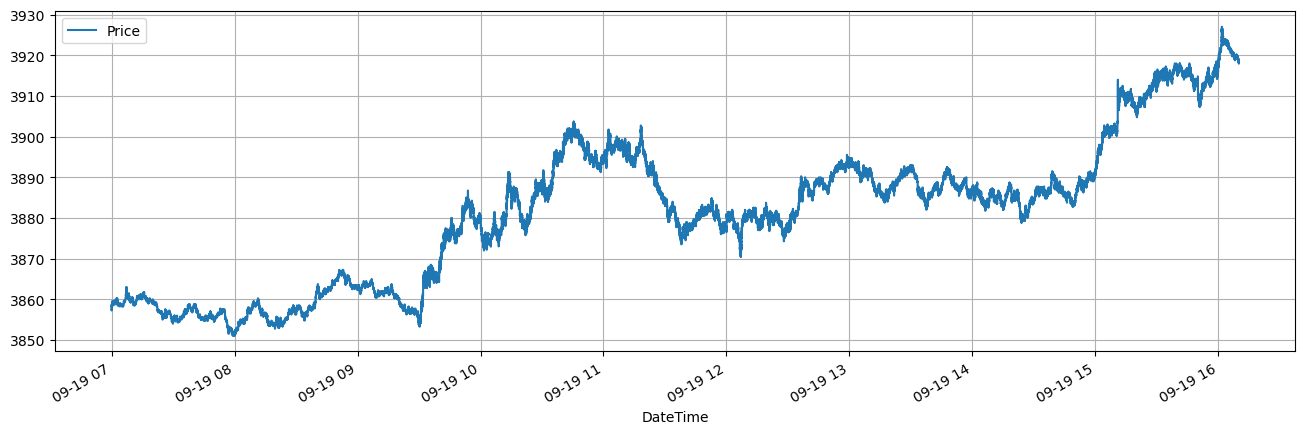

In [7]:
es['2022-09-19 07:00:00': '2022-09-19 16:10:00'].plot( y='Price', figsize=(16,5)) 
plt.grid()

#### resample tick chart to second interval

In [35]:
def resample_df(df, col1, name1, col2, name2, col3, name3, on_col, on_name):
    df = pd.DataFrame({name1: col1, on_col: on_col})
    res_df = df.resample('1s', on= on_name).sum()
    return res_df

def resampling_max(col1, name1, on_col, on_name):
    '''make resampled df from columns on value of max; change to '1Min' if minutes needed. 
    In case of BidAsk max, given 1 number, that number is always the max, with choice of 5 values (-2,-1,0,1,2)'''
    df = pd.DataFrame({name1: col1, on_name: on_col})
    res_df = df.resample('1s', on= on_name).max()  #.fillna(0)
    return res_df

def resampling_sum(col1, name1, on_col, on_name):  
    '''make resampled df from columns on sum; change to '1Min' if minutes needed'''
    df = pd.DataFrame({name1: col1, on_name: on_col})
    res_df = df.resample('1s', on= on_name).sum() #.fillna(0)
    return res_df

def merge_DFs(d1, d2, d3):
    d = pd.DataFrame()
    d = pd.merge(d1, d2, on='Date')
    d = pd.merge(d, d3, on='Date')
    return d

- Transversion to 1 sec  intervals from tick data df, by Resampling; reducing tick ds (~1,500,000) to df (~50,000)

In [14]:
# aa = resampling_sum(es['Vol'], 'Vol', es.Date, 'Date')
# # aa.shape  # (86394, 1)
# aa.head(5)
# bb = resampling_max(es['BidAsk'], 'BidAsk',  es.Date, 'Date')
# bb.shape  # (86394, 1)
# bb.head(5)
# cc = resampling_max(es['Price'], 'Price',  es.Date, 'Date')
# cc.shape  # (86394, 1)
# cc.head(5)
# fff = merge_DFs(aa, bb, cc)
# fff.columns  #   (['Vol', 'BidAsk', 'Price'], dtype='object')
# # type(fff.index) # pandas.core.indexes.datetimes.DatetimeIndex
# fff.index  # DatetimeIndex(['2022-09-19 00:00:02', '2022-09-19 00:00:03',
# fff.tail(5)
# fff.shape  #(86394, 3)  86400 seconds in 24 hrs (- midday brake)
# type(fff.index)  #   pandas.core.indexes.datetimes.DatetimeIndex
# fff.dtypes

# fff['Date'] = fff.index.copy() # add column Date for further processing 
# fff.sample(50)
# # fff.dtypes

fff['Date'] = fff.index.copy() # add column Date for further processing 
fff.tail(50)
fff.isna().sum()   # df contains many NaN values at this stage

Vol           0
BidAsk    36965
Price     36965
Date          0
dtype: int64

 #### 96.4% Reduction in size from row ds (ES tick data, 1,365,444) - to second interval df (fff1, 49,429)

In [76]:
es.head() 
es.shape # (1365444, 4)
fff.head()
fff.shape #  (86394, 4)
# fffSecond = fff.copy().dropna()
fffSecond.shape  # (49,429, 4)  
# 49429 / 1365444 = 0.03619994668400901
# 0.03619994668400901 * 100 = 3.6199946684009014  # 3.6% 
# 100 - 3.6  = 96.4% Reduction in size 

(49429, 4)

In [77]:
fffSecond.head()
# fffSecond.shape #(49429, 4)
# fffSecond.to_csv(r'C:\Users\tonya\Desktop\SpringBoardAssignments\Capstone2\df_Sec_2022-09-19.csv') # save local copy to csv

,Vol,BidAsk,Price,Date
Date,,,,
2022-09-19 00:00:02,1,1.0,3882.25,2022-09-19 00:00:02
2022-09-19 00:00:03,6,-1.0,3882.00,2022-09-19 00:00:03
2022-09-19 00:00:04,1,1.0,3882.00,2022-09-19 00:00:04
2022-09-19 00:00:05,1,1.0,3882.25,2022-09-19 00:00:05
2022-09-19 00:00:15,1,1.0,3882.00,2022-09-19 00:00:15


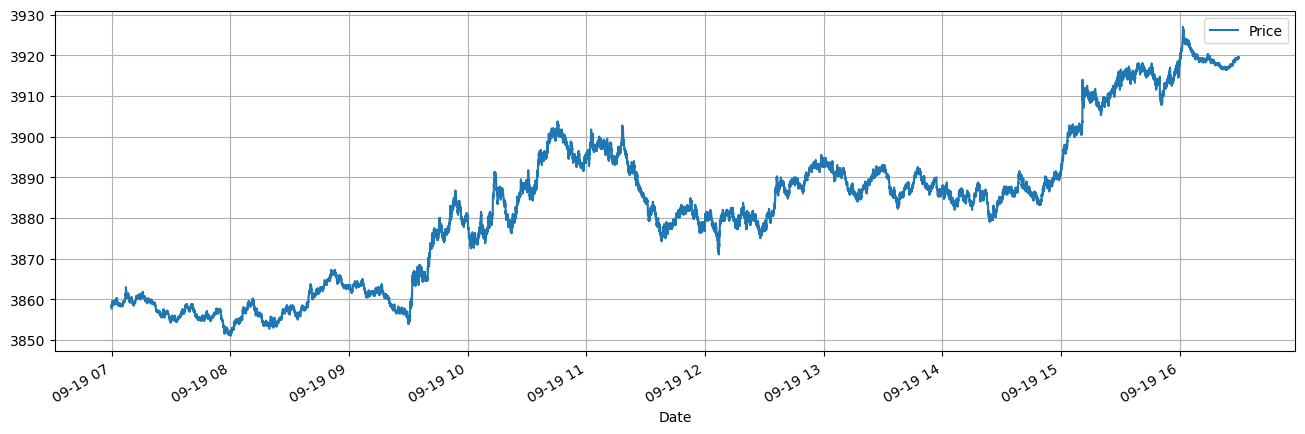

In [40]:
fffSecond['2022-09-19 07:00:00': '2022-09-19 16:30:00'].plot(y = ['Price'] , figsize=(16,5))  # 
plt.grid()

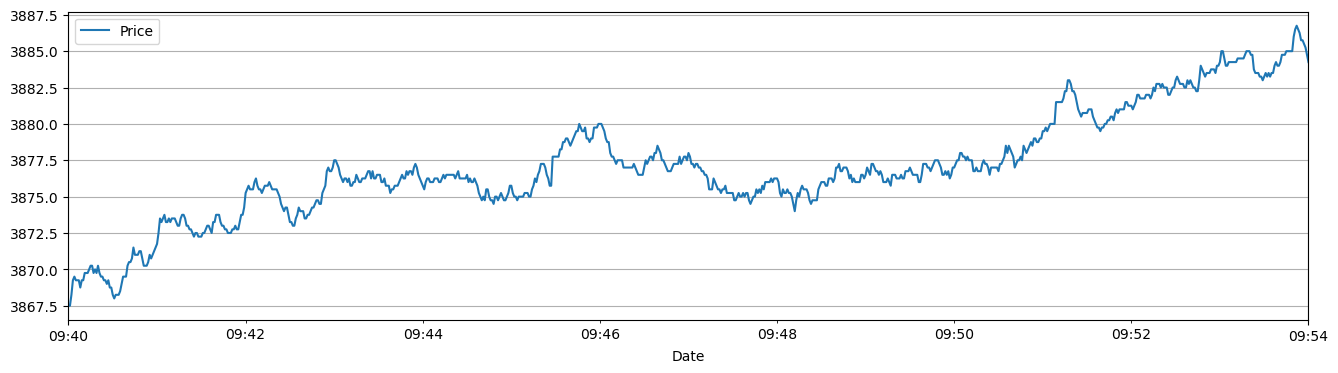

In [43]:
fffSecond['2022-09-19 09:40:00': '2022-09-19 09:54:00'].plot(y = ['Price'] , figsize=(16,4))  # Linear Run
plt.grid() 

In [44]:
es.head()
es.dtypes

Vol                int64
BidAsk             int64
Price            float64
Date      datetime64[ns]
dtype: object

- Transversion to 1 min candle  OHLC transversion intervals from tick data df


In [75]:
es.dtypes
type(es.index)
es.head()
es.shape    #(1365444, 4)

(1365444, 4)

In [72]:
# es5 =  pd.read_csv("C:\August2022\ES 12-22 Globex_2022_09_19.csv",  index_col= 0 )
# mapping = {'AtBid': -1, 'AtAsk': 1, 'BelowBid': -2, 'AboveAsk': 2, 'BetweenBidAsk':0 }   # remap categorical ---->  ints
# es5 = es5.replace({'AtAsk': mapping}) 
# es5.rename(columns={'1': 'Vol', 'AtAsk':'BidAsk', '3882.1':'Price' }, inplace=True)
# del es5['3881.75']  # deleting not needed columns
# del es5['3882']
# es5.index.name = 'Date_Time'

# es5.index = pd.to_datetime(es5.index, format='%Y-%m-%d %H:%M:%S')
# type(es5.index) # pandas.core.indexes.datetimes.DatetimeIndex
es5.sample(20)


,Vol,BidAsk,Price
Date_Time,,,
2022-09-19 05:51:52,1,-1,3852.75
2022-09-19 10:15:50,1,1,3887.00
2022-09-19 12:51:12,1,-1,3890.00
2022-09-19 12:27:28,1,-1,3875.75
2022-09-19 13:19:17,2,1,3886.25
2022-09-19 11:53:07,1,-1,3884.00
2022-09-19 09:39:01,1,-1,3864.75
2022-09-19 11:02:56,1,-1,3898.50
2022-09-19 10:18:08,1,2,3885.50


In [81]:
from functools import reduce

def merge_manyDF(df1, df2):
    data_frames = [df1, df2]
    df_merged = reduce(lambda  left, right: pd.merge(left, right, on='Date', how='outer'), data_frames)
    return df_merged

def resampling_1minBoo(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 min'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('1min', on= on_name).max()             
    dfLow = df.resample('1min', on= on_name).min() 
    dfOpen = df.resample('1min', on= on_name).first() 
    dfClose = df.resample('1min', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

In [79]:
es.head()

,Vol,BidAsk,Price,Date
DateTime,,,,
2022-09-19 00:00:02,1,1,3882.25,2022-09-19 00:00:02
2022-09-19 00:00:03,1,-1,3882.00,2022-09-19 00:00:03
2022-09-19 00:00:03,1,-1,3882.00,2022-09-19 00:00:03
2022-09-19 00:00:03,1,-1,3882.00,2022-09-19 00:00:03
2022-09-19 00:00:03,1,-1,3882.00,2022-09-19 00:00:03


In [84]:

aaPrice5 = resampling_1minBoo(es['Price'], 'Price', es.Date, 'Date')
mapping2 = {aaPrice5.columns[0]: 'Open', aaPrice5.columns[1]: 'High', aaPrice5.columns[2]: 'Low', aaPrice5.columns[3]: 'Close'}
aaPrice5 = aaPrice5.rename(columns= mapping2)
aaPrice5.head()
# aaPrice.shape #(1440, 4)

,Open,High,Low,Close
Date,,,,
2022-09-19 00:00:00,3882.25,3883.00,3882.00,3882.75
2022-09-19 00:01:00,3882.75,3883.25,3882.50,3883.25
2022-09-19 00:02:00,3883.25,3883.25,3882.50,3883.00
2022-09-19 00:03:00,3883.00,3883.25,3882.50,3882.75
2022-09-19 00:04:00,3883.00,3883.75,3882.75,3883.00


In [66]:
def resampling_sum(col1, name1, on_col, on_name):  
    '''make resampled df from columns on sum; change to '1Min' if minutes needed'''
    df = pd.DataFrame({name1: col1, on_name: on_col})
    res_df = df.resample('1min', on= on_name).sum() #.fillna(0)
    return res_df
aaVol5 = resampling_sum(es['Vol'], 'Vol', es.Date, 'Date')
aaVol5.head()
# aaVol5.shape      # (1440, 1)

,Vol
Date,
2022-09-19 00:00:00,62
2022-09-19 00:01:00,105
2022-09-19 00:02:00,71
2022-09-19 00:03:00,56
2022-09-19 00:04:00,98


In [65]:
aaBidAsk = resampling_sum(es['BidAsk'], 'BidAsk', es.Date, 'Date')
# mapping2 = {aaVol.columns[3]: 'BidAsk'}
# aaBidAsk = aaBidAsk.rename(columns= mapping2)
aaBidAsk.head()
# aaBidAsk.shape #(1440, 1)

,BidAsk
Date,
2022-09-19 00:00:00,27
2022-09-19 00:01:00,37
2022-09-19 00:02:00,-14
2022-09-19 00:03:00,9
2022-09-19 00:04:00,5


In [304]:

df_1min = merge_DFs(aaPrice, aaVol, aaBidAsk)
df_1min.shape   #(1440, 6)
df_1min.head()
df_1min.sample(5)
# df_1min.to_csv(r'C:\Users\tonya\Desktop\SpringBoardAssignments\Capstone2\df_1min_Ind.csv')  # save local copy of 1min df # (1440, 6)
df_1min['2022-09-19 07:00:00': '2022-09-19 16:30:00'].plot(y = ['Close'] , figsize=(16,3))  # 
plt.grid()

NameError: name 'aaPrice' is not defined

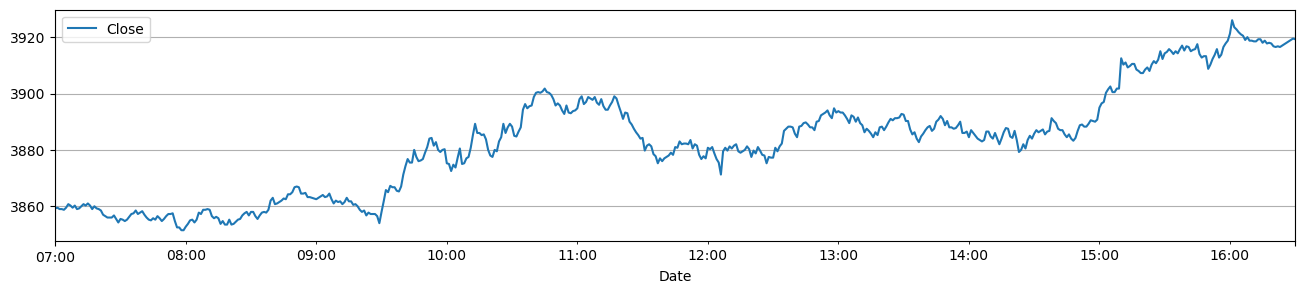

In [32]:
es2 =  pd.read_csv("C:\August2022\ES 12-22 Globex_2022_09_19.csv",  index_col= 0 )
mapping = {'AtBid': -1, 'AtAsk': 1, 'BelowBid': -2, 'AboveAsk': 2, 'BetweenBidAsk':0 }   # remap categorical ---->  ints
es2 = es2.replace({'AtAsk': mapping}) 
es2.rename(columns={'1': 'Vol', 'AtAsk':'BidAsk', '3882.1':'Price' }, inplace=True)
del es2['3881.75']  # deleting not needed columns
del es2['3882']
es2.index.name = 'Date_Time'

es2.head()

# es2.index = pd.to_datetime(es2.index, format='%Y-%m-%d %H:%M:%S')
# type(es2.index)
# resample_LTP = es2['Price'].resample('1Min').ohlc(_method='ohlc') # doesnt work

from functools import reduce

def merge_manyDF(df1, df2):
    data_frames = [df1, df2]
    df_merged = reduce(lambda  left, right: pd.merge(left, right, on='Date', how='outer'), data_frames)
    return df_merged

def resampling_10min(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 min'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('10min', on= on_name).max()             
    dfLow = df.resample('10min', on= on_name).min() 
    dfOpen = df.resample('10min', on= on_name).first() 
    dfClose = df.resample('10min', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final
def resampling_1min(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 min'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('1min', on= on_name).max()             
    dfLow = df.resample('1min', on= on_name).min() 
    dfOpen = df.resample('1min', on= on_name).first() 
    dfClose = df.resample('1min', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

aaPrice = resampling_1min(es['Price'], 'Price', es.Date, 'Date')
mapping2 = {aaPrice.columns[0]: 'Open', aaPrice.columns[1]: 'High', aaPrice.columns[2]: 'Low', aaPrice.columns[3]: 'Close'}
aaPrice = aaPrice.rename(columns= mapping2)
aaPrice.head()
# aaPrice.shape #(1440, 4)

def resampling_sum(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 min'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    return final

def resampling_sum(col1, name1, on_col, on_name):  
    '''make resampled df from columns on sum; change to '1Min' if minutes needed'''
    df = pd.DataFrame({name1: col1, on_name: on_col})
    res_df = df.resample('1min', on= on_name).sum() #.fillna(0)
    return res_df

aaVol = resampling_sum(es['Vol'], 'Vol', es.Date, 'Date')
# mapping2 = {aaVol.columns[3]: 'Vol'}
# aaVol = aaVol.rename(columns= mapping2)
aaVol.head()
# aaVol.shape #(1440, 1)

aaBidAsk = resampling_sum(es['BidAsk'], 'BidAsk', es.Date, 'Date')
# mapping2 = {aaVol.columns[3]: 'BidAsk'}
# aaBidAsk = aaBidAsk.rename(columns= mapping2)
aaBidAsk.head()
# aaBidAsk.shape #(1440, 1)

df_1min = merge_DFs(aaPrice, aaVol, aaBidAsk)
df_1min.shape   #(1440, 6)
df_1min.head()
df_1min.sample(5)
# df_1min.to_csv(r'C:\Users\tonya\Desktop\SpringBoardAssignments\Capstone2\df_1min_Ind.csv')  # save local copy of 1min df # (1440, 6)
df_1min['2022-09-19 07:00:00': '2022-09-19 16:30:00'].plot(y = ['Close'] , figsize=(16,3))  # 
plt.grid()

In [46]:
df_1min['2022-09-19 11:25:00': '2022-09-19 11:40:00'].head(20)


,Open,High,Low,Close,Vol,BidAsk
Date,,,,,,
2022-09-19 11:25:00,3889.75,3891.25,3887.75,3889.00,6236,-268
2022-09-19 11:26:00,3888.75,3889.00,3886.25,3887.50,5905,-685
2022-09-19 11:27:00,3887.25,3887.75,3885.75,3886.25,3907,-174
2022-09-19 11:28:00,3886.25,3886.50,3884.50,3885.25,3725,-246
2022-09-19 11:29:00,3885.25,3885.25,3883.50,3884.00,4587,104
2022-09-19 11:30:00,3883.75,3884.75,3883.00,3884.25,4491,73
2022-09-19 11:31:00,3884.25,3884.25,3879.00,3879.75,7683,-368
2022-09-19 11:32:00,3879.75,3882.50,3879.00,3881.50,5180,106
2022-09-19 11:33:00,3881.50,3884.00,3881.25,3882.00,4985,32


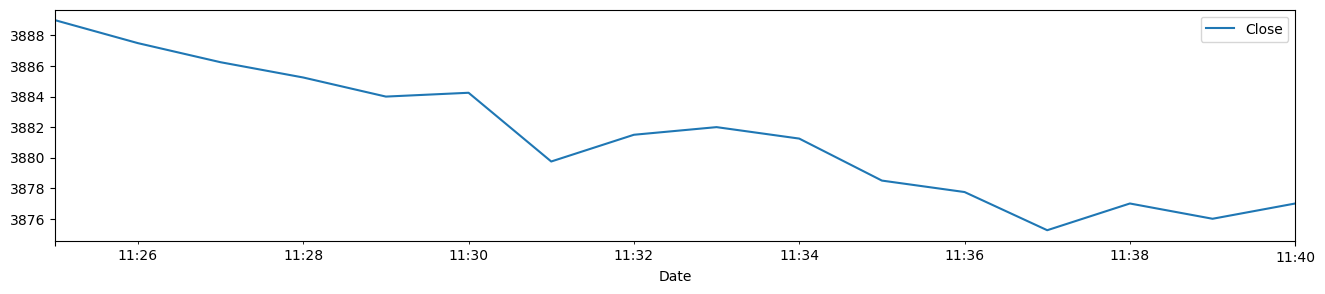

In [51]:
df_1min['2022-09-19 11:25:00': '2022-09-19 11:40:00'].plot(y = ['Close'] , figsize=(16,3)) 

In [56]:
df_1min['2022-09-19 11:40:00': '2022-09-19 12:10:00'].head(40)

,Open,High,Low,Close,Vol,BidAsk,ohlc_T,ohlc_T2,BidAsk_T
Date,,,,,,,,,
2022-09-19 11:40:00,3875.75,3879.00,3874.50,3877.00,4495,-39,-79.535897,-397.782143,-37.666667
2022-09-19 11:41:00,3876.75,3878.75,3875.75,3877.50,3203,177,25.037934,8.768365,176.779661
2022-09-19 11:42:00,3877.50,3878.75,3876.75,3878.00,3659,34,182.500000,65.203793,39.205882
2022-09-19 11:43:00,3878.00,3879.50,3877.00,3879.00,3249,65,59.673077,47.746157,65.523077
2022-09-19 11:44:00,3878.75,3879.75,3878.00,3878.25,2389,-65,-477.446154,-29.848080,-66.000000
2022-09-19 11:45:00,3878.25,3881.25,3878.00,3881.00,4101,609,4.247126,25.483582,608.893268
2022-09-19 11:46:00,3881.00,3882.00,3879.50,3880.75,4427,136,45.664706,9.516546,140.477941
2022-09-19 11:47:00,3881.00,3883.00,3880.00,3883.00,3947,452,5.725664,6.872346,452.300885
2022-09-19 11:48:00,3883.00,3883.25,3880.50,3882.00,2593,-224,-23.113839,-5.780507,-226.017857


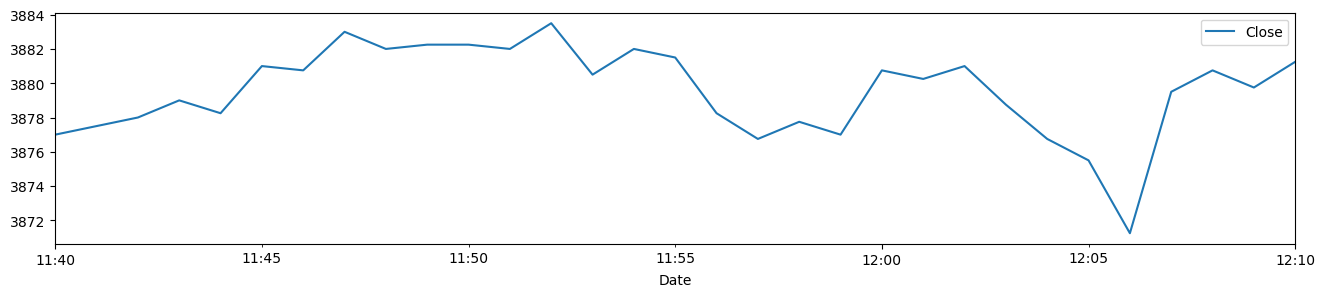

In [55]:
df_1min['2022-09-19 11:40:00': '2022-09-19 12:10:00'].plot(y = ['Close'] , figsize=(16,3)) 

In [49]:
df_1min.tail(5)

,Open,High,Low,Close,Vol,BidAsk,ohlc_T,ohlc_T2,BidAsk_T
Date,,,,,,,,,
2022-09-19 23:55:00,3925.50,3925.75,3925.25,3925.50,74,-36,-872.361111,-436.208336,-36.027778
2022-09-19 23:56:00,3925.50,3925.75,3925.50,3925.50,67,-29,-inf,-541.500003,-27.758621
2022-09-19 23:57:00,3925.50,3926.00,3925.50,3925.75,100,24,1308.583333,inf,22.791667
2022-09-19 23:58:00,3925.50,3926.25,3925.50,3925.75,61,-10,-3140.700000,-1570.350008,-12.400000
2022-09-19 23:59:00,3925.75,3926.25,3925.75,3926.25,45,-7,-2243.428571,-2243.642887,-5.571429


In [48]:
df_1min['ohlc_T2'] = (df_1min['Open']**2 + df_1min['High'].shift(1) **2 ) / (df_1min['Close'].shift(1) **2 - df_1min['Low'].shift(1) **2 ) / df_1min['BidAsk']
df_1min['BidAsk_T'] =  df_1min['BidAsk'] + df_1min['BidAsk'].shift(1) / df_1min['BidAsk'] 

In [37]:
df_1min.head()
# df_1min.shape # (1440, 6)
df_1min['ohlc_T'] = (df_1min['Open'] * df_1min['High'] ) / (df_1min['Low'] + df_1min['Close'] ) / df_1min['BidAsk']

In [ ]:
es.head()

In [23]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

hovertext=[]
for i in range(len(df_1min['Open'])):
    hovertext.append('Open: '+str(df_1min['Open'][i])+'<br>Close: '+str(df_1min['Close'][i]))

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=go.Ohlc(x=df_1min.index,
                open=df_1min['Open'],
                high=df_1min['High'],
                low=df_1min['Low'],
                close=df_1min['Close'],
                text= hovertext,
                hoverinfo='text'))
fig.show()

In [15]:
df_Kaya = pd.read_csv(r"C:\Users\tonya\Desktop\SpringBoardAssignments\Capstone2\df_Sec_2022-09-19.csv", index_col='Date')
df_Kaya.head()
# df_Kaya.shape # (49429, 4)


,Vol,BidAsk,Price,Date.1
Date,,,,
2022-09-19 00:00:02,1,1.0,3882.25,2022-09-19 00:00:02
2022-09-19 00:00:03,6,-1.0,3882.00,2022-09-19 00:00:03
2022-09-19 00:00:04,1,1.0,3882.00,2022-09-19 00:00:04
2022-09-19 00:00:05,1,1.0,3882.25,2022-09-19 00:00:05
2022-09-19 00:00:15,1,1.0,3882.00,2022-09-19 00:00:15


- Add features to 1min df

In [ ]:
df_Kaya['PTarg_60sec'] = df_Kaya.Price.shift(-60)  # (60*1)  10 seconds projected in future
df_Kaya['PTarget5'] = df_Kaya.Price.shift(-300)    # (60*5)   5 minutes projected in future
df_Kaya['PTarget15'] = df_Kaya.Price.shift(-900)   # (60*15)   10 minutes projected in future
df_Kaya['PTarget30'] = df_Kaya.Price.shift(-1800)  # (60*30)   30 minutes projected in future

In [ ]:

df_Kaya['B_A_CumSumAvr2K'] = df_Kaya['BidAsk'].rolling(2000).mean()  #  sum delta of Bid/Ask over 2K
df_Kaya['B_A_CumSumAvr4K'] = df_Kaya['BidAsk'].rolling(4000).mean() #  sum delta of Bid/Ask over 10K
df_Kaya['B_A_CumSumAvr10K'] = df_Kaya['BidAsk'].rolling(10000).mean() #  sum delta of Bid/Ask over 5K

df_Kaya['B_A_CumSumAvr1m'] = df_Kaya['BidAsk'].rolling(60).mean()   #  sum delta of Bid/Ask over 1min
df_Kaya['B_A_CumSumAvr5m'] = df_Kaya['BidAsk'].rolling(300).mean()  #  sum delta of Bid/Ask over 5min
df_Kaya['B_A_CumSumAvr10m'] = df_Kaya['BidAsk'].rolling(600).mean()    #  sum delta of Bid/Ask over 10min
df_Kaya['B_A_CumSumAvr30m'] = df_Kaya['BidAsk'].rolling(1800).mean()    #  sum delta of Bid/Ask over 10min

df_Kaya['B_A_Kaya_1m'] = df_Kaya['BidAsk'].rolling(60).mean()  *  60  / 100  #  prop Kaya 
df_Kaya['B_A_Kaya_3m'] = df_Kaya['BidAsk'].rolling(300).mean()  * 180 / 100   #  prop Kaya 
df_Kaya['B_A_Kaya_10m'] = df_Kaya['BidAsk'].rolling(600).mean()  * 600 / 100   #  prop Kaya 
df_Kaya['B_A_Kaya_30m'] = df_Kaya['BidAsk'].rolling(1800).mean()   * 1800 / 100   #  prop Kaya 

df_Kaya['B_A_SumAvr10m'] = df_Kaya['BidAsk'].rolling(600).sum()  #  sum delta of Bid/Ask over 10min
# fff.shape  # (86394, 13)
df_Kaya.shape  # (49429, 20)
# df_Kaya.columns
# df_Kaya.dtypes

(49429, 20)

In [ ]:
df_Kaya['2022-09-19 12:00:00': '2022-09-19 12:45:00'].head(5)

,Vol,BidAsk,Price,Date.1,B_A_CumSumAvr2K,B_A_CumSumAvr4K,B_A_CumSumAvr10K,B_A_CumSumAvr1m,B_A_CumSumAvr5m,B_A_CumSumAvr10m,B_A_CumSumAvr30m,B_A_Kaya_1m,B_A_Kaya_3m,B_A_Kaya_10m,B_A_Kaya_30m,B_A_SumAvr10m,PTarg_60sec,PTarget5,PTarget15,PTarget30
Date,,,,,,,,,,,,,,,,,,,,
2022-09-19 12:00:00,148,1.0,3877.00,2022-09-19 12:00:00,0.9505,0.97025,0.9684,0.85,0.893333,0.878333,0.947222,0.51,1.608,5.27,17.05,527.0,3880.75,3877.00,3879.00,3879.00
2022-09-19 12:00:01,151,1.0,3877.75,2022-09-19 12:00:01,0.9505,0.97025,0.9686,0.85,0.893333,0.881667,0.947222,0.51,1.608,5.29,17.05,529.0,3881.00,3876.50,3878.75,3878.75
2022-09-19 12:00:02,86,1.0,3878.00,2022-09-19 12:00:02,0.9505,0.97025,0.9686,0.85,0.893333,0.881667,0.947222,0.51,1.608,5.29,17.05,529.0,3881.25,3876.75,3878.75,3878.25
2022-09-19 12:00:03,41,1.0,3878.00,2022-09-19 12:00:03,0.9505,0.97025,0.9686,0.85,0.893333,0.881667,0.947222,0.51,1.608,5.29,17.05,529.0,3881.25,3876.75,3878.75,3878.25
2022-09-19 12:00:04,521,2.0,3880.00,2022-09-19 12:00:04,0.9510,0.97050,0.9687,0.90,0.896667,0.883333,0.947778,0.54,1.614,5.30,17.06,530.0,3881.00,3877.75,3879.00,3878.50


In [ ]:
# df_1min = df_1min.reindex(columns = [col for col in df_1min.columns if col != 'Price'] + ['Price']) # move Price at the as last column
# df_1min.columns

In [ ]:
df_Kaya['2022-09-19 09:40:00': '2022-09-19 09:45:00'].head(5)  #  

,Vol,BidAsk,Price,Date.1,B_A_CumSumAvr2K,B_A_CumSumAvr4K,B_A_CumSumAvr10K,B_A_CumSumAvr1m,B_A_CumSumAvr5m,B_A_CumSumAvr10m,B_A_CumSumAvr30m,B_A_Kaya_1m,B_A_Kaya_3m,B_A_Kaya_10m,B_A_Kaya_30m,B_A_SumAvr10m,PTarg_60sec,PTarget5,PTarget15,PTarget30
Date,,,,,,,,,,,,,,,,,,,,
2022-09-19 09:40:00,171,2.0,3867.50,2022-09-19 09:40:00,0.703,0.62175,0.5045,1.1,1.07,1.091667,0.740000,0.66,1.926,6.55,13.32,655.0,3871.75,3875.75,3882.00,3877.00
2022-09-19 09:40:01,146,1.0,3867.50,2022-09-19 09:40:01,0.704,0.62225,0.5045,1.1,1.07,1.090000,0.740000,0.66,1.926,6.54,13.32,654.0,3872.50,3875.25,3881.50,3877.00
2022-09-19 09:40:02,318,1.0,3868.25,2022-09-19 09:40:02,0.704,0.62225,0.5045,1.1,1.07,1.088333,0.740000,0.66,1.926,6.53,13.32,653.0,3873.50,3875.00,3881.50,3876.75
2022-09-19 09:40:03,440,1.0,3869.25,2022-09-19 09:40:03,0.704,0.62200,0.5045,1.1,1.07,1.086667,0.740000,0.66,1.926,6.52,13.32,652.0,3873.25,3875.00,3881.25,3877.00
2022-09-19 09:40:04,303,1.0,3869.50,2022-09-19 09:40:04,0.705,0.62200,0.5047,1.1,1.07,1.086667,0.741111,0.66,1.926,6.52,13.34,652.0,3873.50,3874.75,3881.25,3876.50


 #### Linear Regression model for linear pattern run

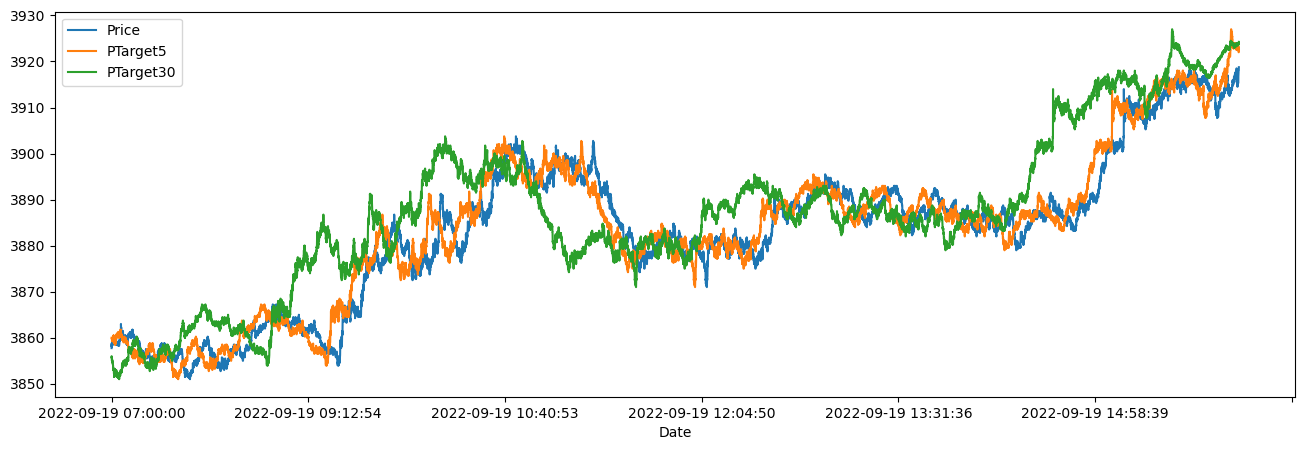

In [ ]:
df_Kaya['2022-09-19 07:00:00': '2022-09-19 16:00:00'].plot(y=['Price', 'PTarget5','PTarget30'], figsize=(16,5))  # Linear Regression model for linear pattern run

In [ ]:
# Calculate the upward and downward deviations from the Open on 1 min interval candle
dff_1min['Std_U'] = dff_1min['High']- dff_1min['Open']
dff_1min['Std_D'] = dff_1min['Open']- dff_1min['Low']
# Calculate 3-day moving average of close prices
dff_1min['S_3'] = dff_1min['Close'].shift(1).rolling(window=3).mean()

# Calculate 15-day moving average of close prices
dff_1min['S_15'] = dff_1min['Close'].shift(1).rolling(window=15).mean()

# Calculate 60-day moving average of close prices
dff_1min['S_60'] = dff_1min['Close'].shift(1).rolling(window=60).mean()

# Calculate correlation between previous close and 3-day moving average for past 10 days
dff_1min['Corr'] = dff_1min['Close'].shift(1).rolling(window=10).corr(dff_1min['S_3'].shift(1))

# Calculate OD, which shows changes since previous open
dff_1min['OD'] = dff_1min['Open']- dff_1min['Open'].shift(1)

# Calculate OL, which shows overnight changes
dff_1min['OL'] = dff_1min['Close'].shift(1) - dff_1min['Open']
dff_1min.shape  # (1440, 14)
dff_1min.tail()


,Open,High,Low,Close,Vol,BidAsk,Std_U,Std_D,S_3,S_15,S_60,Corr,OD,OL
Date,,,,,,,,,,,,,,
2022-09-19 23:55:00,3925.50,3925.75,3925.25,3925.50,74,-36,0.25,0.25,3925.500000,3925.516667,3924.662500,0.338480,0.00,0.00
2022-09-19 23:56:00,3925.50,3925.75,3925.50,3925.50,67,-29,0.25,0.00,3925.500000,3925.533333,3924.679167,0.108326,0.00,0.00
2022-09-19 23:57:00,3925.50,3926.00,3925.50,3925.75,100,24,0.50,0.00,3925.500000,3925.583333,3924.691667,0.166762,0.00,0.00
2022-09-19 23:58:00,3925.50,3926.25,3925.50,3925.75,61,-10,0.75,0.00,3925.583333,3925.650000,3924.712500,0.170200,0.00,0.25
2022-09-19 23:59:00,3925.75,3926.25,3925.75,3926.25,45,-7,0.50,0.00,3925.666667,3925.700000,3924.729167,0.172610,0.25,0.00


In [ ]:
dff_1min.shape #(1440, 14)
dff_1min.isna().sum()  # 179 at S_60, 89 at S_15 , few 59s  etc.
dff_1minCopy = dff_1min.copy().dropna()  # clear NaN's 
dff_1minCopy.shape # (1260, 14)
dff_1minCopy.isna().sum() # 0
dff_1minCopy.sample(20)

,Open,High,Low,Close,Vol,BidAsk,Std_U,Std_D,S_3,S_15,S_60,Corr,OD,OL
Date,,,,,,,,,,,,,,
2022-09-19 03:37:00,3864.75,3865.50,3863.75,3864.25,222,-23,0.75,1.00,3863.750000,3863.050000,3868.045833,0.102269,1.00,0.00
2022-09-19 04:40:00,3864.00,3864.25,3863.50,3863.75,364,31,0.25,0.50,3865.416667,3866.866667,3865.766667,0.429124,-1.50,0.00
2022-09-19 01:47:00,3882.00,3882.00,3880.50,3880.75,75,-37,0.00,1.50,3881.333333,3881.416667,3882.383333,-0.340217,0.50,-0.25
2022-09-19 11:57:00,3878.25,3878.50,3876.00,3876.75,5129,-540,0.25,2.25,3880.583333,3880.950000,3887.908333,-0.056543,-3.00,0.00
2022-09-19 21:54:00,3924.00,3924.25,3923.50,3924.00,252,14,0.25,0.50,3923.333333,3921.533333,3922.504167,0.939431,0.75,0.00
2022-09-19 06:27:00,3852.50,3852.75,3851.75,3852.25,240,-47,0.25,0.75,3852.333333,3849.300000,3851.787500,0.939991,-0.25,0.00
2022-09-19 09:51:00,3879.25,3883.00,3879.25,3881.00,7557,462,3.75,0.00,3877.333333,3873.550000,3864.708333,0.451737,2.50,-0.25
2022-09-19 16:53:00,3924.00,3924.50,3923.75,3924.50,172,25,0.50,0.25,3923.666667,3923.350000,3920.025000,-0.766995,0.50,-0.25
2022-09-19 12:29:00,3877.25,3878.75,3876.25,3877.25,2249,-4,1.50,1.00,3876.916667,3879.016667,3879.537500,0.259022,2.25,0.25


### PROCEDURE FOR MAKING OHLC 1 MIN CANDLES DF -- START

In [ ]:
# MAKE OHLC 1 MIN CANDLES FROM TICK DATA
es2 =  pd.read_csv("C:\August2022\ES 12-22 Globex_2022_09_19.csv",  index_col= 0 )
mapping = {'AtBid': -1, 'AtAsk': 1, 'BelowBid': -2, 'AboveAsk': 2, 'BetweenBidAsk':0 }   # remap categorical ---->  ints
es2 = es2.replace({'AtAsk': mapping}) 
es2.rename(columns={'1': 'Vol', 'AtAsk':'BidAsk', '3882.1':'Price' }, inplace=True)
del es2['3881.75']  # deleting not needed columns
del es2['3882']
es2.index.name = 'Date_Time'

es2.head()

# es2.index = pd.to_datetime(es2.index, format='%Y-%m-%d %H:%M:%S')

from functools import reduce

def merge_manyDF(df1, df2):
    data_frames = [df1, df2]
    df_merged = reduce(lambda  left, right: pd.merge(left, right, on='Date', how='outer'), data_frames)
    return df_merged

def resampling_10min(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 min'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('10min', on= on_name).max()             
    dfLow = df.resample('10min', on= on_name).min() 
    dfOpen = df.resample('10min', on= on_name).first() 
    dfClose = df.resample('10min', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final
def resampling_1min(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 min'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('1min', on= on_name).max()             
    dfLow = df.resample('1min', on= on_name).min() 
    dfOpen = df.resample('1min', on= on_name).first() 
    dfClose = df.resample('1min', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

aaPrice = resampling_1min(es['Price'], 'Price', es.Date, 'Date')
mapping2 = {aaPrice.columns[0]: 'Open', aaPrice.columns[1]: 'High', aaPrice.columns[2]: 'Low', aaPrice.columns[3]: 'Close'}
aaPrice = aaPrice.rename(columns= mapping2)
aaPrice.head()
# aaPrice.shape #(1440, 4)

def resampling_sum(col1, name1, on_col, on_name):  
    '''make resampled df from columns on sum; change to '1Min' if minutes needed'''
    df = pd.DataFrame({name1: col1, on_name: on_col})
    res_df = df.resample('1min', on= on_name).sum() #.fillna(0)
    return res_df

aaVol = resampling_sum(es['Vol'], 'Vol', es.Date, 'Date')
# mapping2 = {aaVol.columns[3]: 'Vol'}
# aaVol = aaVol.rename(columns= mapping2)
aaVol.head()
# aaVol.shape #(1440, 1)

aaBidAsk = resampling_sum(es['BidAsk'], 'BidAsk', es.Date, 'Date')
# mapping2 = {aaVol.columns[3]: 'BidAsk'}
# aaBidAsk = aaBidAsk.rename(columns= mapping2)
aaBidAsk.head()
# aaBidAsk.shape #(1440, 1)

df2_1min = merge_DFs(aaPrice, aaVol, aaBidAsk)
df2_1min.shape   #(1440, 6)
df2_1min.head()
df2_1min.sample(5)

df2_1min['2022-09-19 07:00:00': '2022-09-19 16:30:00'].plot(y = ['Close'] , figsize=(16,5))  # 
plt.grid()

In [ ]:
df2_1min.shape   #(1440, 6)
df2_1min.head()

### PROCEDURE FOR MAKING OHLC 1 MIN CANDLES DF -- END

In [ ]:
# FROM THE lINEAR REG CHAPTER 7
# Machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Data manipulation
import pandas as pd
import numpy as np

# To fetch data, you can read data from CSV
Df = pd.read_csv('Prices GLD.csv')
Df = Df.dropna()

# Create input parameters
Df['Std_U'] = Df['High']-Df['Open']
Df['Std_D'] = Df['Open']-Df['Low']

Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean()
Df['S_15'] = Df['Close'].shift(1).rolling(window=15).mean()
Df['S_60'] = Df['Close'].shift(1).rolling(window=60).mean()

Df['OD'] = Df['Open']-Df['Open'].shift(1)
Df['OL'] = Df['Open']-Df['Close'].shift(1)
Df['Corr'] = Df['Close'].shift(1).rolling(window=10).corr(Df['S_3'].shift(1))

X = Df[['Open', 'S_3', 'S_15', 'S_60', 'OD', 'OL', 'Corr']]
yU = Df['Std_U']
yD = Df['Std_D']

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

steps = [('imputation', imp), ('scaler', StandardScaler()),
         ('linear', LinearRegression())]

pipeline = Pipeline(steps)

parameters = {'linear__fit_intercept': [0, 1]}

reg = GridSearchCV(pipeline, parameters, cv=5)

# Train and test split
t = 0.8
split = int(t*len(Df))

# Fit regression equation
reg.fit(X[:split], yU[:split])

# Best fit variable
best_fit = reg.best_params_['linear__fit_intercept']

# Linear regression
reg = LinearRegression(fit_intercept=best_fit)

# Impute NaN values
X = imp.fit_transform(X, yU)

# Fit the model
reg.fit(X[:split], yU[:split])

# Make prediction
yU_predict = reg.predict(X[split:])

reg = GridSearchCV(pipeline, parameters, cv=5)
reg.fit(X[:split], yD[:split])
best_fit = reg.best_params_['linear__fit_intercept']
reg = LinearRegression(fit_intercept=best_fit)

X = imp.fit_transform(X, yD)
reg.fit(X[:split], yD[:split])
yD_predict = reg.predict(X[split:])
Df.reset_index(inplace=True)

# Reset the index
Df.reset_index(inplace=True)

# Create new columns
Df['Max_U'] = 0.0
Df['Max_D'] = 0.0
Df.loc[Df.index >= split, 'Max_U'] = yU_predict
Df.loc[Df.index >= split, 'Max_D'] = yD_predict

Df.loc[Df['Max_U'] < 0, 'Max_U'] = 0
Df.loc[Df['Max_D'] < 0, 'Max_D'] = 0
Df['P_H'] = Df['Open']+Df['Max_U']
Df['P_L'] = Df['Open']-Df['Max_D']

# Calculate daily returns
Df['Ret'] = (Df['Close']-Df['Close'].shift(1))/Df['Close'].shift(1)

# Generate trading signals
Df['Signal'] = 0.0
Df.loc[(Df['High'] > Df['P_H']) & (Df['Low'] > Df['P_L']), 'Signal'] = -1
Df.loc[(Df['High'] < Df['P_H']) & (Df['Low'] < Df['P_L']), 'Signal'] = 1

# Calculate strategy returns
Df['Ret1'] = Df['Ret'] * Df['Signal'].shift(1)

# Calculate excess strategy returns
excess_strategy_returns = Df['Ret1'][split:] - 0.05/252

# Calculate Sharpe ratio
# Type your code below
#``` 1. In a single line of code, check the conditions, whether a value in column High is less than a #value in column P_H and a value in column Low is less than a value in column P_L. If the conditions are #met, assign value 1 in column Signal, indicating a signal to buy. ```

Sharpe = np.sqrt(252) * excess_strategy_returns.mean() /  excess_strategy_returns.std()

print(Sharpe)

In [ ]:
# Machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Pipeline
from sklearn.pipeline import Pipeline

# Import numpy
import numpy as np

# Import blueshift libraries
from blueshift.api import (
                            symbol,
                            order_target_percent,
                            schedule_function,
                            date_rules,
                            time_rules,
                            get_datetime
                        )

# The strategy requires context.lookback number of days. 

def initialize(context):
    # Define Symbols
    context.security = symbol('MSFT')

    # The lookback for historical data
    context.lookback = 300

    # The lookback for correlation
    context.correl_lookback = 10

    # The lookback for MA
    context.MA_lookback_short = 3
    context.MA_lookback_medium = 15
    context.MA_lookback_long = 60

    # The train-test split
    context.split_ratio = 0.7

    # The machine learning regressor for Std_U
    context.reg_U = None

    # The machine learning regressor for Std_D
    context.reg_D = None

    # The machine learning regressor accuracy
    context.accuracy = None

    # The flag variable is used to check if model needs to be retrained
    context.retrain_flag = True

    # Schedule the retrain_model function every month
    schedule_function(
                        retrain_model,
                        date_rule=date_rules.month_start(),
                        time_rule=time_rules.market_open(minutes=30)
                     )

    # Schedule the rebalance function every day
    schedule_function(
                        rebalance,
                        date_rule=date_rules.every_day(),
                        time_rule=time_rules.market_close(minutes=5)
                     )


def retrain_model(context, data):
    """
        A function to retrain the regression. This function is called by the
        schedule_function in the initialize function.
    """
    context.retrain_flag = True


def rebalance(context, data):
    """
        A function to rebalance the portfolio. This function is called by the
        schedule_function in the initialize function.
    """

    # Fetch lookback no. days data for the security
    try:
        Df = data.history(
            context.security,
            ['open', 'high', 'low', 'close'],
            context.lookback + 1,
            '1d')
    except IndexError:
        return

    # Calculate short moving average of close prices
    Df['S_short'] = Df['close'].shift(1).rolling(
        window=context.MA_lookback_short).mean()

    # Calculate medium moving average of close prices
    Df['S_medium'] = Df['close'].shift(1).rolling(
        window=context.MA_lookback_medium).mean()

    # Calculate long moving average of close prices
    Df['S_long'] = Df['close'].shift(1).rolling(
        window=context.MA_lookback_long).mean()

    # Calculate the correlation between close price and short moving average
    Df['Corr'] = Df['close'].shift(1).rolling(
        window=context.correl_lookback).corr(Df['S_short'].shift(1))

    Df['Std_U'] = Df['high']-Df['open']
    Df['Std_D'] = Df['open']-Df['low']

    Df['OD'] = Df['open']-Df['open'].shift(1)
    Df['OL'] = Df['open']-Df['close'].shift(1)
    Df.dropna(inplace = True)

    X_U = Df[['open', 'S_short', 'S_medium', 'S_long', 'OD', 'OL', 'Corr']]
    X_D = X_U
    yU = Df['Std_U']
    yD = Df['Std_D']

    # Calculate the split ratio
    t = context.split_ratio
    split = int(t*len(Df))

    
    if context.retrain_flag:
        context.retrain_flag = False
        steps = [('scaler', StandardScaler()),
                 ('linear', LinearRegression())]

        pipeline = Pipeline(steps)
        parameters = {'linear__fit_intercept': [0, 1]}

        context.reg_U = GridSearchCV(pipeline, parameters, cv=5)
        context.reg_U.fit(X_U[:split], yU[:split])
        best_fit_U = context.reg_U.best_params_['linear__fit_intercept']
        context.reg_U = LinearRegression(fit_intercept=best_fit_U)
        context.reg_U.fit(X_U[:split], yU[:split])

        context.reg_D = GridSearchCV(pipeline, parameters, cv=5)
        context.reg_D.fit(X_D[:split], yD[:split])
        best_fit_D = context.reg_D.best_params_['linear__fit_intercept']
        context.reg_D = LinearRegression(fit_intercept=best_fit_D)
        context.reg_D.fit(X_D[:split], yD[:split])

    yU_predict = context.reg_U.predict(X_U[split:])
    # Assign the predicted values to a new column in the dataframe
    Df.reset_index(inplace=True)
    Df['Max_U'] = 0
    Df.loc[Df.index >= split, 'Max_U'] = yU_predict
    Df.loc[Df['Max_U'] < 0, 'Max_U'] = 0

    yD_predict = context.reg_D.predict(X_D[split:])
    # Assign the predicted values to a new column in the data frame
    Df['Max_D'] = 0
    Df.loc[Df.index >= split, 'Max_D'] = yD_predict
    Df.loc[Df['Max_D'] < 0, 'Max_D'] = 0

    # Use the predicted upside deviation values to calculate the high price
    Df['P_H'] = Df['open'] + Df['Max_U']
    Df['P_L'] = Df['open'] - Df['Max_D']

    context.accuracy = len(
        Df[(Df['P_H'] >= Df['high']) &
           (Df['P_L'] <= Df['low'])]) * 1.0 / len(X_U[split:])

    # Trading signal
    sell_sig = list((Df['high'] > Df['P_H']) & (Df['low'] > Df['P_L'])) [-1]
    buy_sig = list((Df['high'] < Df['P_H'])& (Df['low'] < Df['P_L'])) [-1]

    # Long, short and exit conditions
    long_entry = buy_sig and context.accuracy > 0.3
    short_entry = sell_sig and context.accuracy > 0.3
    exit_position = context.accuracy < 0.3

    # Place the orders
    if long_entry:
        print("{} Long entry condition is {}".format(get_datetime(), long_entry))
        print("{} Going long in: {}".format(get_datetime(), context.security.symbol))
        order_target_percent(context.security, 1)

    elif short_entry:
        print("{} Short entry condition is {}".format(get_datetime(), short_entry))
        print("{} Going short in: {}".format(get_datetime(), context.security.symbol))
        order_target_percent(context.security, -1)

    elif exit_position:
        order_target_percent(context.security, 0)




In [92]:
# d = r"C:\BidAskRepo\NQ 12-22 Globex_2022_10_27.csv"
# col = ['DateTime', 'Vol', 'BidAsk', 'Bid', 'Ask', 'Price']
# nq =  pd.read_csv(d)
# nq.columns = col
# nq.head()
nq.index.name = nq['DateTime']
# nq.index = pd.to_datetime(nq.index)
# del nq['DateTime']
# del nq['Bid']
# del nq['Ask']
# type(nq.index) # pandas.core.indexes.datetimes.DatetimeIndex
# nq['Date'] = nq.index    # make separate dateTime column
nq.head()


,DateTime,Vol,BidAsk,Price,Date
1970-01-01 00:00:00.000000000,2022-10-27 00:00:01,1,AtBid,11498.25,0
1970-01-01 00:00:00.000000001,2022-10-27 00:00:01,1,AtBid,11498.25,1
1970-01-01 00:00:00.000000002,2022-10-27 00:00:01,2,AtBid,11498.25,2
1970-01-01 00:00:00.000000003,2022-10-27 00:00:01,1,AtBid,11498.25,3
1970-01-01 00:00:00.000000004,2022-10-27 00:00:01,1,AtBid,11498.25,4


# From Here OHLC

In [84]:
# MAKE OHLC 1 MIN CANDLES FROM TICK DATA
# d = r"C:\BidAskRepo\NQ 12-22 Globex_2022_10_27.csv"
# col = ['DateTime', 'Vol', 'BidAsk', 'Bid', 'Ask', 'Price']
# nq =  pd.read_csv(d)
# nq.columns = col
# mapping = {'AtBid': -1, 'AtAsk': 1, 'BelowBid': -2, 'AboveAsk': 2, 'BetweenBidAsk':0 }   # remap categorical ---->  ints
# nq = nq.replace({'BidAsk': mapping}) 
# del nq['Bid']
# del nq['Ask']
# nq.index = nq.DateTime
# nq.index = pd.to_datetime(nq.index)
# type(nq.index)
# del nq['DateTime'] 
nq['Date'] = nq.index
# nq.rename(columns={'Datum':'Date'}, inplace=True)
nq.head()
# nq.dtypes
# nq.shape # (692637, 4)


,Vol,BidAsk,Price,Date
DateTime,,,,
2022-10-27 00:00:01,1,-1,11498.25,2022-10-27 00:00:01
2022-10-27 00:00:01,1,-1,11498.25,2022-10-27 00:00:01
2022-10-27 00:00:01,2,-1,11498.25,2022-10-27 00:00:01
2022-10-27 00:00:01,1,-1,11498.25,2022-10-27 00:00:01
2022-10-27 00:00:01,1,-1,11498.25,2022-10-27 00:00:01


### Functions to make OHLC candles from tick data

In [301]:
## Functions to make OHLC candles from tick data
from functools import reduce

def merge_manyDF(df1, df2):
    data_frames = [df1, df2]
    df_merged = reduce(lambda  left, right: pd.merge(left, right, on='Date', how='outer'), data_frames)
    return df_merged

def resampling_10min(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 min'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('10min', on= on_name).max()             
    dfLow = df.resample('10min', on= on_name).min() 
    dfOpen = df.resample('10min', on= on_name).first() 
    dfClose = df.resample('10min', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_2Sec(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('2S', on= on_name).max()             
    dfLow = df.resample('2S', on= on_name).min() 
    dfOpen = df.resample('2S', on= on_name).first() 
    dfClose = df.resample('2S', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_10Sec(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('10S', on= on_name).max()             
    dfLow = df.resample('10S', on= on_name).min() 
    dfOpen = df.resample('10S', on= on_name).first() 
    dfClose = df.resample('10S', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_3Min(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('3T', on= on_name).max()             
    dfLow = df.resample('3T', on= on_name).min() 
    dfOpen = df.resample('3T', on= on_name).first() 
    dfClose = df.resample('3T', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_2Sec_BidAsk(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('2S', on= on_name).sum()             
    dfLow = df.resample('2S', on= on_name).sum() 
    dfOpen = df.resample('2S', on= on_name).sum() 
    dfClose = df.resample('2S', on= on_name).sum() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_1MinBidAsk(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('1T', on= on_name).sum()             
    dfLow = df.resample('1T', on= on_name).sum() 
    dfOpen = df.resample('1T', on= on_name).sum() 
    dfClose = df.resample('1T', on= on_name).sum() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_3MinBidAsk(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('3T', on= on_name).sum()             
    dfLow = df.resample('3T', on= on_name).sum() 
    dfOpen = df.resample('3T', on= on_name).sum() 
    dfClose = df.resample('3T', on= on_name).sum() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final


def resampling_1min(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 min'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('1min', on= on_name).max()             
    dfLow = df.resample('1min', on= on_name).min() 
    dfOpen = df.resample('1min', on= on_name).first() 
    dfClose = df.resample('1min', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def merge_DFs(d1, d2, d3):
    d = pd.DataFrame()
    d = pd.merge(d1, d2, on='Date')
    d = pd.merge(d, d3, on='Date')
    return d
  

## Procedure for making 2 seconds  candles

In [302]:
# nqPrice_2sec = resampling_2Sec(nq['Price'], 'Price', nq.Date, 'Date')
# mapping2S = {nqPrice_2sec.columns[0]: 'Open', nqPrice_2sec.columns[1]: 'High', nqPrice_2sec.columns[2]: 'Low', nqPrice_2sec.columns[3]: 'Close'}
# nqPrice_2sec = nqPrice_2sec.rename(columns= mapping2S)
# nqPrice_2sec.head(20)
# nqPrice_2sec.shape  #  (43199, 4) -----------

# nqVol2sec = resampling_2Sec_BidAsk(nq['Vol'], 'Vol', nq.Date, 'Date')
# mappingV = {nqVol2sec.columns[0]: 'Vol'}
# nqVol2sec = nqVol2sec.rename(columns= mappingV)
# del nqVol2sec['Vol_y_x']
# del nqVol2sec['Vol_x_y']
# del nqVol2sec['Vol_y_y']
# nqVol2sec.sample(5)
# nqVol2sec.shape #  (43199, 1)   

# nqBidAsk2Sec = resampling_2Sec_BidAsk(nq['BidAsk'], 'BidAsk', nq.Date, 'Date')
# mappingBA2s = {nqBidAsk2Sec.columns[1]: 'BidAsk'}
# nqBidAsk2Sec = nqBidAsk2Sec.rename(columns= mappingBA2s)
# # del nqBidAsk2Sec['BidAsk_x_x']
# del nqBidAsk2Sec['BidAsk_x_y']
# del nqBidAsk2Sec['BidAsk_y_y']
# nqBidAsk2Sec.tail(20)
# nqBidAsk2Sec.shape     # (43199, 1)

# nq_2Sec = merge_DFs(nqPrice_2sec, nqVol2sec, nqBidAsk2Sec)
nq_2Sec.shape   # (43199, 6)   
# nq_2Sec.head()
nq_2Sec.sample(5)
# nq_2Sec.dropna(inplace=True) #   after droping NaN's it is: (35080, 6)
# nq_2Sec.to_csv('2022-10-27_NQ_2sec.csv')

,Open,High,Low,Close,Vol,BidAsk
Date,,,,,,
2022-10-27 04:06:54,11443.25,11443.75,11443.25,11443.50,5,1
2022-10-27 21:41:16,11180.00,11180.50,11179.25,11180.00,12,1
2022-10-27 00:07:08,11498.00,11498.00,11498.00,11498.00,1,-1
2022-10-27 19:45:00,11151.00,11151.00,11150.75,11150.75,2,-2
2022-10-27 11:32:20,11326.25,11329.00,11326.25,11329.00,31,18


## Procedure for making 3 min candles

In [275]:
# nqPrice_sec = resampling_3Min(nq['Price'], 'Price', nq.Date, 'Date')
# mapping2 = {nqPrice.columns[0]: 'Open', nqPrice.columns[1]: 'High', nqPrice.columns[2]: 'Low', nqPrice.columns[3]: 'Close'}
# nqPrice_sec = nqPrice.rename(columns= mapping2)
# nqPrice_sec.head()
# nqPrice_sec.shape  #   3 min = (480, 4)

# nqVol3 = resampling_3Min(nq['Vol'], 'Vol', nq.Date, 'Date')
# mapping3 = {nqVol3.columns[1]: 'Vol'}
# nqVol3 = nqVol3.rename(columns= mapping3)
# del nqVol3['Vol_x_x']
# del nqVol3['Vol_y_y']
# del nqVol3['Vol_x_y']
# nqVol3.sample(5)
# nqVol3.shape # (480, 4)

# nqBidAsk3 = resampling_3MinBidAsk(nq['BidAsk'], 'BidAsk', nq.Date, 'Date')
# mappingBA = {nqBidAsk3.columns[1]: 'BidAsk'}
# nqBidAsk3 = nqBidAsk3.rename(columns= mappingBA)
# del nqBidAsk3['BidAsk_x_x']
# del nqBidAsk3['BidAsk_x_y']
# del nqBidAsk3['BidAsk_y_y']
# nqBidAsk3.sample(20)
# nqBidAsk3.shape     # (480, 4)

# nq_3min = merge_DFs(nqPrice_sec, nqVol3, nqBidAsk3)
# nq_3min.shape   # (480, 6)
# nq_3min.head()
nq_3min.sample(5)
# nq_3min.to_csv('2022-10-27_NQ_3m.csv')

,Open,High,Low,Close,Vol,BidAsk
Date,,,,,,
2022-10-27 19:21:00,11151.25,11151.25,11146.50,11150.75,17.0,19
2022-10-27 12:45:00,11275.25,11275.75,11268.50,11275.75,30.0,376
2022-10-27 12:39:00,11279.25,11280.75,11275.00,11278.75,10.0,169
2022-10-27 20:24:00,11134.50,11134.50,11130.00,11133.50,10.0,-32
2022-10-27 07:54:00,11377.00,11377.00,11372.25,11372.25,5.0,19


In [300]:
# nqPrice = resampling_1min(nq['Price'], 'Price', nq.Date, 'Date')
# mapping2 = {nqPrice.columns[0]: 'Open', nqPrice.columns[1]: 'High', nqPrice.columns[2]: 'Low', nqPrice.columns[3]: 'Close'}
# nqPrice = nqPrice.rename(columns= mapping2)
# nqPrice.sample(5)
# nqPrice.shape #(1440, 4)

# nqVol = resampling_1MinBidAsk(nq['Vol'], 'Vol', nq.Date, 'Date')
# mapping2 = {nqVol.columns[3]: 'Vol'}
# nqVol = nqVol.rename(columns= mapping2)
# del nqVol['Vol_x_x']
# del nqVol['Vol_y_x']
# del nqVol['Vol_x_y']
# nqVol.head()
# nqVol.shape #(1440, 1)

# nqBidAsk = resampling_1MinBidAsk(nq['BidAsk'], 'BidAsk', nq.Date, 'Date')
# mapping2 = {nqBidAsk.columns[3]: 'BidAsk'}
# nqBidAsk = nqBidAsk.rename(columns= mapping2)
# del nqBidAsk['BidAsk_x_x']
# del nqBidAsk['BidAsk_y_x']
# del nqBidAsk['BidAsk_x_y']
# nqBidAsk.head()
# nqBidAsk.shape #(1440, 1)

# nq_1min = merge_DFs(nqPrice, nqVol, nqBidAsk)
# nq_1min.shape   #(1440, 6)
# nq_1min.head()
# nq_1min.sample(5)
nq_1min.to_csv('2022-10-27_NQ_1m.csv')

In [290]:
from functools import reduce

def merge_manyDF(df1, df2):
    data_frames = [df1, df2]
    df_merged = reduce(lambda  left, right: pd.merge(left, right, on='Date', how='outer'), data_frames)
    return df_merged

def resampling_10min(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 min'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('10min', on= on_name).max()             
    dfLow = df.resample('10min', on= on_name).min() 
    dfOpen = df.resample('10min', on= on_name).first() 
    dfClose = df.resample('10min', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_2Sec(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('2S', on= on_name).max()             
    dfLow = df.resample('2S', on= on_name).min() 
    dfOpen = df.resample('2S', on= on_name).first() 
    dfClose = df.resample('2S', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_10Sec(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('10S', on= on_name).max()             
    dfLow = df.resample('10S', on= on_name).min() 
    dfOpen = df.resample('10S', on= on_name).first() 
    dfClose = df.resample('10S', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_3Min(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('3T', on= on_name).max()             
    dfLow = df.resample('3T', on= on_name).min() 
    dfOpen = df.resample('3T', on= on_name).first() 
    dfClose = df.resample('3T', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_2Sec_BidAsk(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('2S', on= on_name).sum()             
    dfLow = df.resample('2S', on= on_name).sum() 
    dfOpen = df.resample('2S', on= on_name).sum() 
    dfClose = df.resample('2S', on= on_name).sum() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_1MinBidAsk(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('1T', on= on_name).sum()             
    dfLow = df.resample('1T', on= on_name).sum() 
    dfOpen = df.resample('1T', on= on_name).sum() 
    dfClose = df.resample('1T', on= on_name).sum() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_3MinBidAsk(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('3T', on= on_name).sum()             
    dfLow = df.resample('3T', on= on_name).sum() 
    dfOpen = df.resample('3T', on= on_name).sum() 
    dfClose = df.resample('3T', on= on_name).sum() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final


def resampling_1min(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 min'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('1min', on= on_name).max()             
    dfLow = df.resample('1min', on= on_name).min() 
    dfOpen = df.resample('1min', on= on_name).first() 
    dfClose = df.resample('1min', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def merge_DFs(d1, d2, d3):
    d = pd.DataFrame()
    d = pd.merge(d1, d2, on='Date')
    d = pd.merge(d, d3, on='Date')
    return d

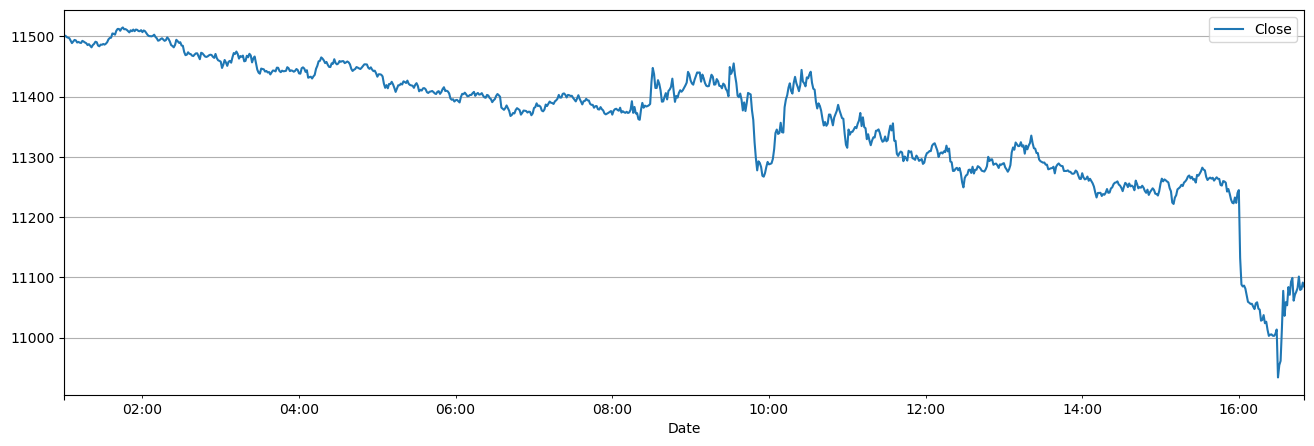

In [142]:

nq_1min['2022-10-27 01:00:00': '2022-10-27 16:50:00'].plot(y = ['Close'] , figsize=(16,5))  # 
plt.grid()

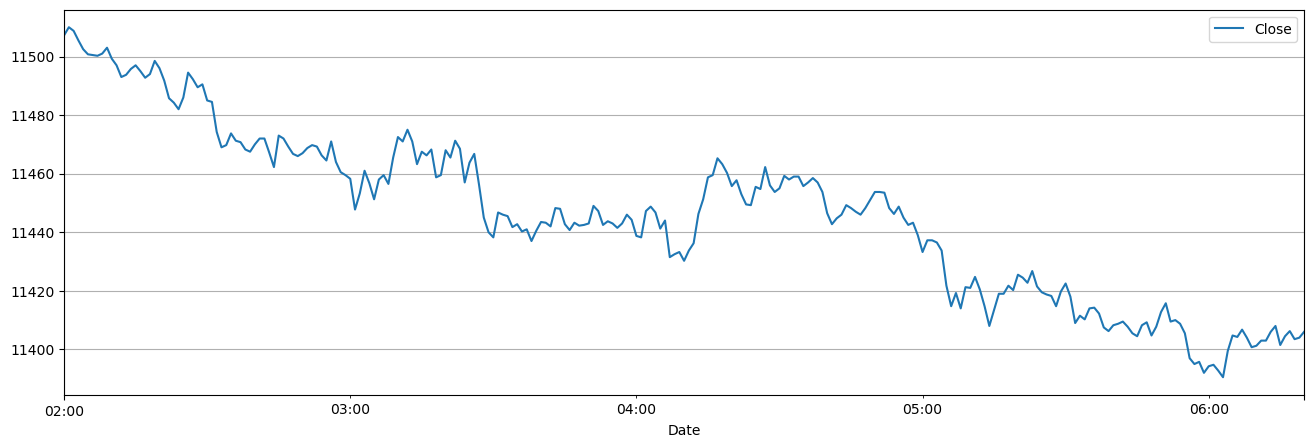

In [303]:

nq_1min['2022-10-27 02:00:00': '2022-10-27 06:20:00'].plot(y = ['Close'] , figsize=(16,5))  # LR sample
plt.grid()
nq_1min.to_csv('NQ2022-10-27Min_LR5.csv')